# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from config import gkey
from config import api_key_weather
from citipy import citipy
from scipy import stats
from scipy.stats import linregress
from pprint import pprint
import numpy as np

## Generate Cities List

In [2]:
# csv_path = "cities.csv"
# cities_df = pd.read_csv(csv_path)
# cities_df

# Generate latitudes(-90 to 90) and longitudes(-180 to 180) using random number generator and multiply by 100
cities_df=pd.DataFrame({"long":(np.random.uniform(-1.8,1.8,643)*100), "lat":(np.random.uniform(-0.9,0.9,643)*100)})

cities_df

,long,lat
0,-57.674516,-62.582100
1,132.886572,-60.624605
2,-31.748455,69.432861
3,-32.387572,-71.762530
4,67.998090,-56.581155
...,...,...
638,159.001896,71.367395
639,-152.249391,-49.924853
640,-93.922602,-53.672594
641,-148.006271,-29.585245


In [3]:
# mini_list = ["melbourne"]

In [4]:
# cities = cities_df["City"]
# cities_list = cities_df["City"].tolist()
# cities_list



cities_name=[]
for i in range(0,len(cities_df['lat'])):
    lat=cities_df.iloc[i]['lat']
    long=cities_df.iloc[i]["long"]
    city=citipy.nearest_city(lat,long)
    name=city.city_name
    cities_name.append(name)
    
cities_df['City']=cities_name
cities_df

,long,lat,City
0,-57.674516,-62.582100,ushuaia
1,132.886572,-60.624605,new norfolk
2,-31.748455,69.432861,tasiilaq
3,-32.387572,-71.762530,ushuaia
4,67.998090,-56.581155,saint-philippe
...,...,...,...
638,159.001896,71.367395,cherskiy
639,-152.249391,-49.924853,mataura
640,-93.922602,-53.672594,punta arenas
641,-148.006271,-29.585245,mataura


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [18]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL; leave out q parameter and set that to cities
query_url = f"{url}appid={api_key_weather}&units={units}&q="

# response = requests.get(query_url + "Melbourne").json()
# response

record_no = 0
# add_record_no = 0

cityname = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities_name:
    try:
        response = requests.get(query_url + city).json()
        city_name = response["name"]
        cityname.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        record_no += 1
#   pprint(response)

        print(f"Processing Record {record_no} | {city_name}")
        
    except:
        print("City not found. Skipping...")

Processing Record 1 | Ushuaia
Processing Record 2 | New Norfolk
Processing Record 3 | Tasiilaq
Processing Record 4 | Ushuaia
Processing Record 5 | Saint-Philippe
Processing Record 6 | Mwingi
Processing Record 7 | Albany
Processing Record 8 | Rikitea
Processing Record 9 | Suntar
Processing Record 10 | Jiuquan
Processing Record 11 | Cape Town
Processing Record 12 | Karratha
Processing Record 13 | Chicama
Processing Record 14 | Nikolskoye
Processing Record 15 | Gumdag
Processing Record 16 | Pevek
Processing Record 17 | Royan
Processing Record 18 | Saint-Philippe
City not found. Skipping...
Processing Record 19 | Thompson
Processing Record 20 | Hambantota
City not found. Skipping...
Processing Record 21 | Rikitea
City not found. Skipping...
Processing Record 22 | Mahébourg
City not found. Skipping...
Processing Record 23 | Ridgecrest
City not found. Skipping...
City not found. Skipping...
Processing Record 24 | Fershampenuaz
Processing Record 25 | Khatanga
Processing Record 26 | Puerto Ayo

Processing Record 229 | Bonavista
Processing Record 230 | Provideniya
Processing Record 231 | Dhidhdhoo
Processing Record 232 | Cape Town
Processing Record 233 | Kapaa
Processing Record 234 | Jamestown
Processing Record 235 | Lazarev
Processing Record 236 | Avera
Processing Record 237 | Cape Town
City not found. Skipping...
Processing Record 238 | Swellendam
Processing Record 239 | Voloshka
Processing Record 240 | Flinders
Processing Record 241 | Pangnirtung
Processing Record 242 | Hamilton
Processing Record 243 | Bredasdorp
Processing Record 244 | Lillooet
Processing Record 245 | Katsuura
Processing Record 246 | Junction City
Processing Record 247 | Sharan
Processing Record 248 | Kenai
Processing Record 249 | Bilma
Processing Record 250 | Jamestown
Processing Record 251 | Roald
Processing Record 252 | Slave Lake
Processing Record 253 | Hilo
Processing Record 254 | Nemuro
Processing Record 255 | Nanortalik
Processing Record 256 | Hasaki
Processing Record 257 | Vaini
Processing Record 2

Processing Record 454 | Sarkand
Processing Record 455 | Ancud
Processing Record 456 | Thākurganj
Processing Record 457 | Codrington
Processing Record 458 | Sarkand
Processing Record 459 | Port Lincoln
Processing Record 460 | Salalah
Processing Record 461 | Bluff
Processing Record 462 | Avarua
Processing Record 463 | Nikki
Processing Record 464 | Pochutla
Processing Record 465 | Saint George
Processing Record 466 | Mataura
Processing Record 467 | Yellowknife
Processing Record 468 | Korla
Processing Record 469 | Cabo San Lucas
Processing Record 470 | Rundu
Processing Record 471 | Shuya
Processing Record 472 | Safaga
Processing Record 473 | Rūdbār
Processing Record 474 | Kavieng
Processing Record 475 | Rafaela
Processing Record 476 | Deputatsky
Processing Record 477 | Port Macquarie
Processing Record 478 | Bluff
City not found. Skipping...
Processing Record 479 | Cape Town
Processing Record 480 | San Cristobal
Processing Record 481 | Caucayá
Processing Record 482 | Río Gallegos
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather = pd.DataFrame({"City":cityname,"Latitude":latitude,"Longitude":longitude,"Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,"Wind Speed":wind_speed,"Country":country,"Date":date})
weather

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
1,New Norfolk,-42.7826,147.0587,60.01,69,0,1.10,AU,1616159130
2,Tasiilaq,65.6145,-37.6368,28.40,86,20,9.22,GL,1616159130
3,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
4,Saint-Philippe,-21.3585,55.7679,82.99,74,90,23.02,RE,1616159130
...,...,...,...,...,...,...,...,...,...
584,Cherskiy,68.7500,161.3000,-30.01,100,0,2.80,RU,1616159275
585,Mataura,-46.1927,168.8643,55.00,88,100,5.01,NZ,1616159156
586,Punta Arenas,-53.1500,-70.9167,51.80,76,75,8.05,CL,1616159151
587,Mataura,-46.1927,168.8643,55.00,88,100,5.01,NZ,1616159156


In [20]:
weather.to_csv("weatherdata.csv",index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.
hum_over_hun = weather.loc[weather["Humidity"] >= 100]
hum_over_hun

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
29,Humboldt,40.6665,-123.9178,42.01,100,40,8.05,US,1616159137
53,Fortuna,40.5982,-124.1573,42.01,100,40,8.05,US,1616159145
188,Ancud,-41.8697,-73.8203,50.00,100,90,2.30,CL,1616159181
190,Lomovka,53.9194,58.3672,23.00,100,90,8.95,RU,1616159182
211,San Cristobal,7.7669,-72.2250,73.40,100,75,2.30,VE,1616159145
276,Kununurra,-15.7667,128.7333,75.20,100,75,4.61,AU,1616159203
278,Petropavlovsk-Kamchatskiy,53.0452,158.6483,33.80,100,90,8.95,RU,1616159203
337,Ancud,-41.8697,-73.8203,50.00,100,90,2.30,CL,1616159181
381,São Gabriel da Cachoeira,-0.1303,-67.0892,75.20,100,0,2.30,BR,1616159229
402,Fortuna,40.5982,-124.1573,42.01,100,40,8.05,US,1616159145


In [26]:
index_values = hum_over_hun.index.values
index_values

array([ 29,  53, 188, 190, 211, 276, 278, 337, 381, 402, 454, 479, 487,
       527, 549, 557, 561, 584], dtype=int64)

In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

dropped_hums = weather.drop(index = index_values)
dropped_hums

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
1,New Norfolk,-42.7826,147.0587,60.01,69,0,1.10,AU,1616159130
2,Tasiilaq,65.6145,-37.6368,28.40,86,20,9.22,GL,1616159130
3,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
4,Saint-Philippe,-21.3585,55.7679,82.99,74,90,23.02,RE,1616159130
...,...,...,...,...,...,...,...,...,...
583,Jamestown,42.0970,-79.2353,28.00,58,1,16.35,US,1616159150
585,Mataura,-46.1927,168.8643,55.00,88,100,5.01,NZ,1616159156
586,Punta Arenas,-53.1500,-70.9167,51.80,76,75,8.05,CL,1616159151
587,Mataura,-46.1927,168.8643,55.00,88,100,5.01,NZ,1616159156


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

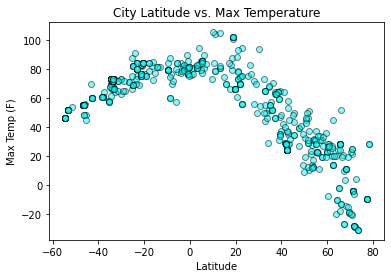

In [95]:
x_axis = dropped_hums["Latitude"]
y_axis = dropped_hums["Max Temp"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(-20,-20),fontsize=15,color="red")

plt.scatter(x_axis,y_axis,color='cyan',alpha=0.5,edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("latvtemp.png")
plt.show()

In [ ]:
# This code is analysing the relationship between city latitude and maximum temperature. Without the line of regression, 
# it is still identifiable that higher temperatures can be found closer to the equator.

## Latitude vs. Humidity Plot

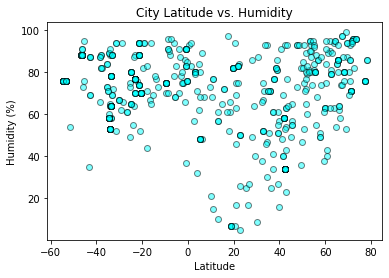

In [96]:
x_axis = dropped_hums["Latitude"]
y_axis1 = dropped_hums["Humidity"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis1)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

plt.scatter(x_axis,y_axis1,color='cyan',alpha=0.5,edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("latvhum.png")
plt.show()

In [ ]:
# This code is analysing the relationship between city latitude and humidity. It does not appear that there is a clear
# relationship between the two factors. Rather, the distribution of the data appears somewhat random, but with a 
# tendency towards higher levels of humidity globally (~80%) rather than lower levels of humidity.

## Latitude vs. Cloudiness Plot

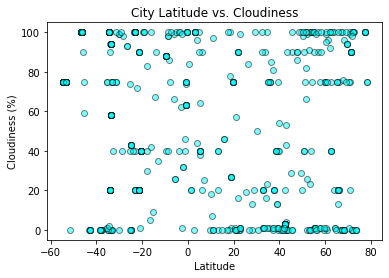

In [97]:
x_axis = dropped_hums["Latitude"]
y_axis2 = dropped_hums["Cloudiness"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis2)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

plt.scatter(x_axis,y_axis2,color='cyan',alpha=0.5,edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("latvclouds.png")
plt.show()

In [ ]:
# This code is analysing the relationship between city latitude and cloudiness. As with above, it does not appear 
# that there is a clear relationship between the two factors. Rather, the distribution of the data appears somewhat random.

## Latitude vs. Wind Speed Plot

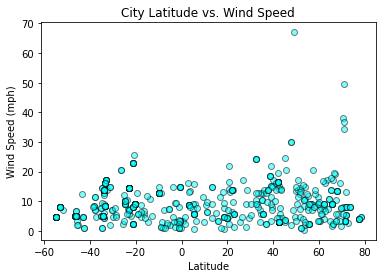

In [98]:
x_axis = dropped_hums["Latitude"]
y_axis3 = dropped_hums["Wind Speed"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis3)
# regress_values = x_axis * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.annotate(line_eq,(-20,20),fontsize=15,color="red")

plt.scatter(x_axis,y_axis3,color='cyan',alpha=0.5,edgecolors='black')
# plt.plot(x_axis,regress_values,"r-")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("latvwind.png")
plt.show()

In [94]:
# This code is analysing the relationship between city latitude and wind speed. It does not appear that there is a clear
# relationship between the two factors. Rather, the distribution of the data appears somewhat random, but with a tendency
# towards lower wind speeds globally (<10 mph) rather than higher wind speeds.

Linear Regression

In [70]:
northern_hemisphere = dropped_hums.loc[dropped_hums["Latitude"]>0]
northern_hemisphere

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Tasiilaq,65.6145,-37.6368,28.40,86,20,9.22,GL,1616159130
6,Albany,42.6001,-73.9662,24.01,34,3,3.00,US,1616159131
8,Suntar,62.1444,117.6319,20.19,90,100,7.58,RU,1616159131
9,Jiuquan,39.7432,98.5174,37.00,16,54,8.19,CN,1616159076
13,Nikolskoye,59.7035,30.7861,23.00,63,75,8.95,RU,1616159132
...,...,...,...,...,...,...,...,...,...
576,Bilma,18.6853,12.9164,102.24,7,27,4.88,NE,1616159176
577,Tūkrah,32.5341,20.5791,72.93,38,100,12.64,LY,1616159273
579,Yellowknife,62.4560,-114.3525,14.00,79,40,9.22,CA,1616159210
583,Jamestown,42.0970,-79.2353,28.00,58,1,16.35,US,1616159150


In [72]:
southern_hemisphere = dropped_hums.loc[dropped_hums["Latitude"]<0]
southern_hemisphere

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
1,New Norfolk,-42.7826,147.0587,60.01,69,0,1.10,AU,1616159130
3,Ushuaia,-54.8000,-68.3000,46.40,76,75,4.61,AR,1616159129
4,Saint-Philippe,-21.3585,55.7679,82.99,74,90,23.02,RE,1616159130
5,Mwingi,-0.9344,38.0601,85.96,37,74,8.01,KE,1616159131
...,...,...,...,...,...,...,...,...,...
581,Busselton,-33.6500,115.3333,73.00,64,58,8.37,AU,1616159139
582,Bambous Virieux,-20.3428,57.7575,84.20,70,40,9.22,MU,1616159216
585,Mataura,-46.1927,168.8643,55.00,88,100,5.01,NZ,1616159156
586,Punta Arenas,-53.1500,-70.9167,51.80,76,75,8.05,CL,1616159151


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7897310128751664


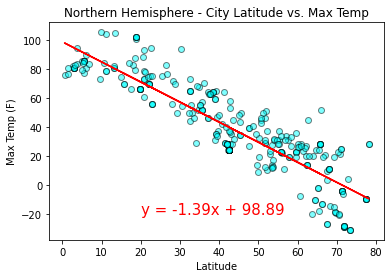

In [99]:
x_axis_new = northern_hemisphere["Latitude"]
y_axis4 = northern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new, y_axis4)
regress_values = x_axis_new * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,-20),fontsize=15,color="red")

plt.scatter(x_axis_new,y_axis4,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Northern Hemisphere - City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("latvtemp_nh.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6553967470998168


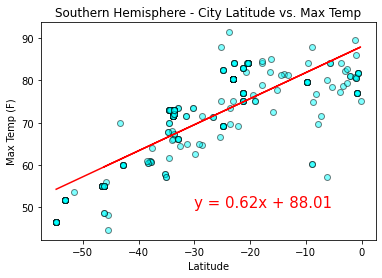

In [100]:
x_axis_new1 = southern_hemisphere["Latitude"]
y_axis8 = southern_hemisphere["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new1, y_axis8)
regress_values = x_axis_new1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.scatter(x_axis_new1,y_axis8,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new1,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Southern Hemisphere - City Latitude vs. Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")

plt.savefig("latvtemp_sh.png")
plt.show()

In [ ]:
# From these two plots it is much easier to identify that there are warmer temperatures closer to the equator, as the
# r-squared values indicate there is in the Northern Hemisphere a strong correlation between warmer temperatures and 
# latitudes closer to the equator, and that there is in the Southern Hemisphere a moderate correlation between warmer
# temperatures and latitudes closer to the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12435638508209072


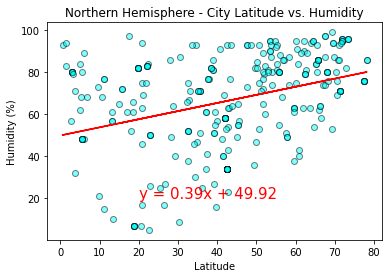

In [101]:
x_axis_new = northern_hemisphere["Latitude"]
y_axis5 = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new, y_axis5)
regress_values = x_axis_new * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,20),fontsize=15,color="red")

plt.scatter(x_axis_new,y_axis5,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Northern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("latvhum_nh.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.006125175907573639


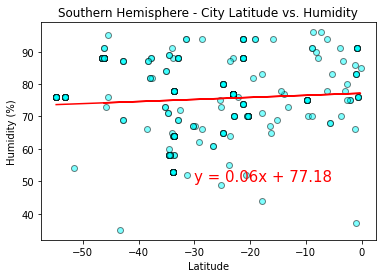

In [102]:
x_axis_new1 = southern_hemisphere["Latitude"]
y_axis9 = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new1, y_axis9)
regress_values = x_axis_new1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.scatter(x_axis_new1,y_axis9,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new1,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Southern Hemisphere - City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.savefig("latvhum_sh.png")
plt.show()

In [ ]:
# According to the r-squared values there is no correlation between city latitude and humidity. Looking at the lines of
# regression, there is perhaps a very weak correlation between these two factors in the Northern Hemisphere, but this is 
# more certainly not the case for the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01421066180640948


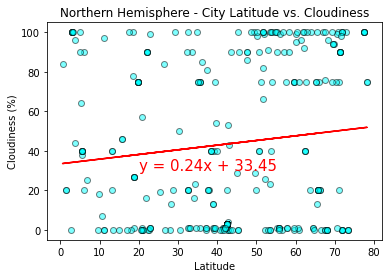

In [103]:
x_axis_new = northern_hemisphere["Latitude"]
y_axis6 = northern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new, y_axis6)
regress_values = x_axis_new * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,30),fontsize=15,color="red")

plt.scatter(x_axis_new,y_axis6,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Northern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("latvclouds_nh.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.3779663447075631e-05


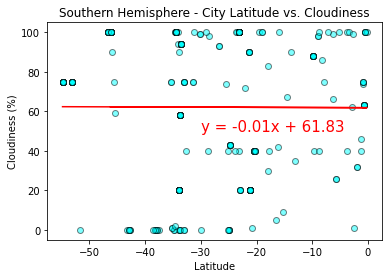

In [107]:
x_axis_new1 = southern_hemisphere["Latitude"]
y_axis9 = southern_hemisphere["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new1, y_axis9)
regress_values = x_axis_new1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.scatter(x_axis_new1,y_axis9,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new1,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Southern Hemisphere - City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig("latvclouds_sh.png")
plt.show()

In [ ]:
# Once again, according to the r-squared values there is no correlation between city latitude and cloudiness. Looking 
# at the lines of regression, there is perhaps a very weak correlation between these two factors in the Northern Hemisphere,
# but this is more certainly not the case for the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004266166201339908


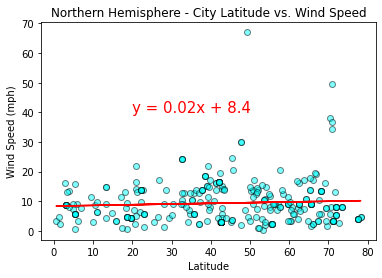

In [105]:
x_axis_new = northern_hemisphere["Latitude"]
y_axis7 = northern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new, y_axis7)
regress_values = x_axis_new * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.scatter(x_axis_new,y_axis7,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Northern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("latvwind_nh.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0032346523397158915


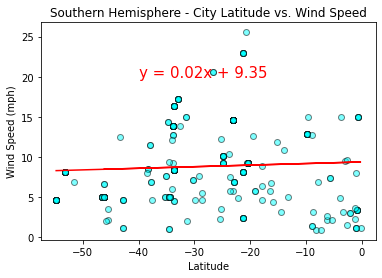

In [106]:
x_axis_new1 = southern_hemisphere["Latitude"]
y_axis10 = southern_hemisphere["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_new1, y_axis10)
regress_values = x_axis_new1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

plt.scatter(x_axis_new1,y_axis10,color='cyan',alpha=0.5,edgecolors='black')
plt.plot(x_axis_new1,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Southern Hemisphere - City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig("latvwind_sh.png")
plt.show()

In [ ]:
# Once again, according to the r-squared values there is no correlation between city latitude and wind speed. Looking 
# at the lines of regression, there is no correlation between the two factors in either hemisphere.